In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [73]:
missing_values = train_data.isnull().sum()
print(missing_values[missing_values>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [74]:
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

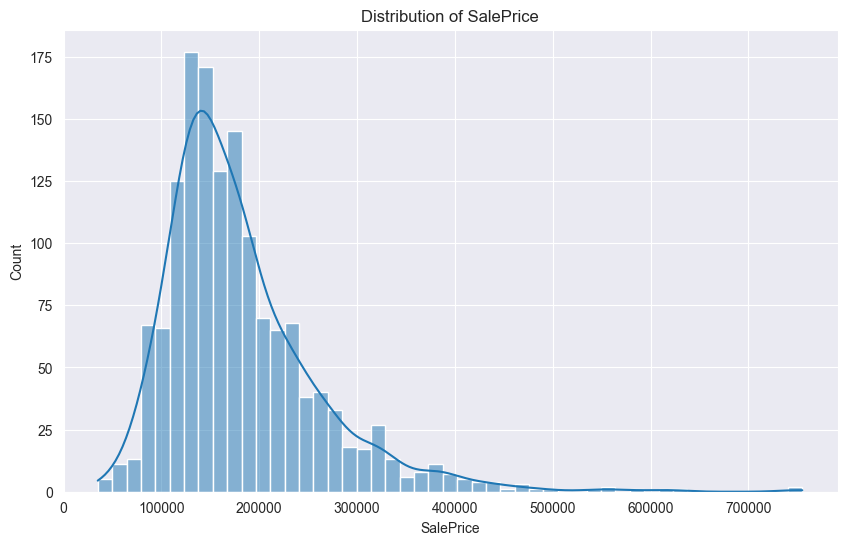

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

In [76]:
y_log = np.log1p(y)

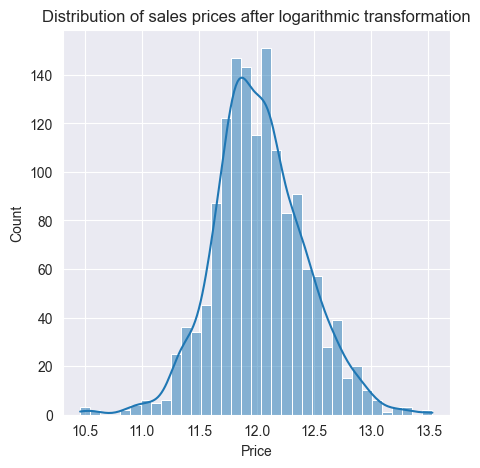

In [77]:
plt.figure(figsize=(5, 5))
sns.histplot(y_log, kde=True)
plt.title('Distribution of sales prices after logarithmic transformation')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [78]:
y = y_log

In [79]:
missing_data = X.isnull().sum()
print(missing_data[missing_data>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [80]:
fill_ms_val_median = ['LotFrontage', 'GarageYrBlt']
fill_ms_val_unknown = ['Alley', 'FireplaceQu']
fill_ms_val_none = ['MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
fill_ms_val_0 = ['MasVnrArea']
fill_ms_val_freq = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in fill_ms_val_median:
    X[col] = X[col].fillna(X[col].median())
    test_data[col] = test_data[col].fillna(X[col].median())
    
for col in fill_ms_val_unknown:
    X[col] = X[col].fillna('Unknown')
    test_data[col] = test_data[col].fillna('Unknown')
    
for col in fill_ms_val_none:
    X[col] = X[col].fillna('None')
    test_data[col] = test_data[col].fillna('None')
    
for col in fill_ms_val_0:
    X[col] = X[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)
    
for col in fill_ms_val_freq:
    X[col] = X[col].fillna(X[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [81]:
missing_test_data = test_data.columns[test_data.isnull().any()]
missing_test_data.tolist()

for col in missing_test_data:
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])


In [82]:
X = X.drop(columns=['Id'])
test_data = test_data.drop(columns=['Id'])

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [84]:
qua_order = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [85]:
columns_for_one_hot = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
columns_for_label = ['LandSlope', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'GarageFinish', 'PoolQC']
columns_order = ['ExterQual', 'ExterCond']

In [89]:
X = pd.get_dummies(X, columns=columns_for_one_hot)
test_data = pd.get_dummies(test_data, columns=columns_for_one_hot)

X = le.fit_transform(X, columns=columns_for_label)
test_data = le.transform(test_data, columns=columns_for_label)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.